# Picture processing

by: <br/>
Jelte Molenaar <br/>
Michiel van Soest

In deze notebook worden de huidige afbeeldingen aangepast en opgeslagen om meer data te creëren voor het RCNN.

In [1]:
from PIL import Image
from PIL import ImageEnhance
import glob
import matplotlib.pyplot as plt

In [2]:
# folder path voor de output
folder_path = "/datc/shipping/processed_pictures_j/frames/"

## Aanpassingen op de originele frame

In [3]:
brightness_factor = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4]
contrast_factor   = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.3,1.4]
sharpness_factor  = [5.0,20.0]        # [5.0, 10.0, 15.0, 20.0]
color_factor      = [0.0,10.0]             # [0.0, 3.0, 6.0, 10.0]
mirror_factor     = [1]

## Functies

In [4]:
def adjust_brightness(img_origional, frame_number, brightness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Brightness(img_origional)
    out = enhancer_object.enhance(brightness_factor)
    out.save(frame_savename)


In [5]:
def adjust_contrast(img_origional, frame_number, contrast_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Contrast(img_origional)
    out = enhancer_object.enhance(contrast_factor)
    out.save(frame_savename)
    

In [6]:
def adjust_sharpness(img_origional, frame_number, sharpness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Sharpness(img_origional)
    out = enhancer_object.enhance(sharpness_factor)
    out.save(frame_savename)

In [7]:
def adjust_color(img_origional, frame_number, color_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Color(img_origional)
    out = enhancer_object.enhance(color_factor)
    out.save(frame_savename)

In [8]:
def copy_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = "/datc/shipping/processed_pictures_j/overlays/frame_"+ str(frame_number) +'_mask.gif'
    overlay_origional.save(overlay_savename)

In [9]:
def mirror_image_origional(img_origional, frame_number, mirror_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    out = img_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(frame_savename)

In [10]:
def mirror_image_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = "/datc/shipping/processed_pictures_j/overlays/frame_"+ str(frame_number) +'_mask.gif'
    out = overlay_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(overlay_savename)

### Loop - functie

In [11]:
def changeimage(location_frames,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, location_overlays):
    img_origional = Image.open(location_frames)
    overlay_origional = Image.open(location_overlays)
    for x in brightness_factor:
        frame_number = frame_number + 1
        adjust_brightness(img_origional, frame_number, x)
        print(frame_number, "brightness", x)
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in contrast_factor:
        frame_number = frame_number + 1
        adjust_contrast(img_origional, frame_number, x)
        print(frame_number, "contrast" , x)
       
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in sharpness_factor:
        frame_number = frame_number + 1
        adjust_sharpness(img_origional, frame_number, x)
        print(frame_number, "sharpness", x)
     
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in color_factor:
        frame_number = frame_number + 1
        adjust_color(img_origional, frame_number, x)
        print(frame_number, "Color", x)
     
        copy_overlay(overlay_origional, frame_number, overlay_number)
    
    for x in mirror_factor:
        frame_number = frame_number + 1
        mirror_image_origional(img_origional, frame_number, x)
        print(frame_number, "mirror origional")
    
        mirror_image_overlay(overlay_origional, frame_number, overlay_number)
        
    return frame_number        

## opschonen output directory

In [12]:
#clean directory

import glob, os, os.path

mydir = '/datc/shipping/processed_pictures_j/frames/'

filelist = glob.glob(os.path.join(mydir, "*.jpg"))
for f in filelist:
    os.remove(f)
    
mydir = '/datc/shipping/processed_pictures_j/overlays/'

filelist = glob.glob(os.path.join(mydir, "*.gif"))
for f in filelist:
    os.remove(f)


## aanmaken frames en overlays met aanpassingen

In [13]:
#"test weghalen als het geen test meer is"
frame_number = 250
overlay_number = 9999

frames_number = glob.glob("/datc/shipping/origional_pictures_j/frames_test/*")
frames_number = len(frames_number)
print(frames_number, "frames in directory"  )
frames =  len(brightness_factor) + len(sharpness_factor) + len(color_factor) + len(contrast_factor) + len(mirror_factor) #aantal bewerkingen
print(frames, "adjustments on frames"  )

frame = "/datc/shipping/origional_pictures_j/frames_test/frame_1.jpg" #origional image
overlay = '/datc/shipping/origional_pictures_j/overlays_test/frame_1_mask.gif' #origional overlay

for i in range(frames_number):
    print("___________________","bewerken afbeelding",i + 1,"___________________")
    changeimage(frame,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, overlay)
    frame_number = frame_number + frames
    
    frame = '/datc/shipping/origional_pictures_j/frames_test/frame_'+str(i + 1)+'.jpg' #origional image
    overlay = '/datc/shipping/origional_pictures_j/overlays_test/frame_'+str(i + 1)+'_mask.gif' #origional overlay


3 frames in directory
9 adjustments on frames
___________________ bewerken afbeelding 1 ___________________
251 brightness 0.3
252 brightness 1.4
253 contrast 0.3
254 contrast 1.4
255 sharpness 5.0
256 sharpness 20.0
257 Color 0.0
258 Color 10.0
259 mirror origional
___________________ bewerken afbeelding 2 ___________________
260 brightness 0.3
261 brightness 1.4
262 contrast 0.3
263 contrast 1.4
264 sharpness 5.0
265 sharpness 20.0
266 Color 0.0
267 Color 10.0
268 mirror origional
___________________ bewerken afbeelding 3 ___________________
269 brightness 0.3
270 brightness 1.4
271 contrast 0.3
272 contrast 1.4
273 sharpness 5.0
274 sharpness 20.0
275 Color 0.0
276 Color 10.0
277 mirror origional


# Visualiseren

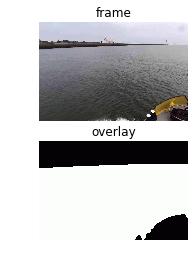

In [40]:
select_frame_number = 268

img_frame = '/datc/shipping/processed_pictures_j/frames/frame_'+ str(select_frame_number)+'.jpg'
img_overlay = '/datc/shipping/processed_pictures_j/overlays/frame_' + str(select_frame_number) + '_mask.gif'

read_img_frame = plt.imread(img_frame)
read_img_overlay = plt.imread(img_overlay)

plt.subplot(2,1,1)
plt.imshow(read_img_frame)
plt.title('frame')
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(read_img_overlay)
plt.title('overlay')
plt.axis('off')

plt.show()

/datc/shipping/origional_pictures_j/frames_test/frame_266.jpg
